In [1]:
%autosave 0 
import warnings
warnings.filterwarnings("ignore")

Autosave disabled


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

import os
import opendatasets as od
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from wrangle import load_dataset, encode_categorical_data, keep_selected_columns
from model import train_and_evaluate_models, evaluate_best_model
from explore import calculate_t_test, split_data_and_create_baseline, univariate_analysis,bivariate_analysis,multivariate

ImportError: cannot import name 'multivariate' from 'explore' (/Users/lordvoldemort/codeup-data-science/Individual-Project/explore.py)

# Acquire & Prep

In [3]:
# Acquiring data from kaggle via API request
df =load_dataset()

Skipping, found downloaded files in "./breast-cancer-dataset" (use force=True to force download)


In [4]:
df = encode_categorical_data(df)

In [5]:
# Keep 4 four columns I hypothesize to be the key driver
df = keep_selected_columns(df)

no null values

feature engineering a new column was not necessary

all Datatypes are appropriate

encoded diagnosis from M and B to 0 and 1

In [6]:
# display new dataframe 
df

,diagnosis,concave points_mean,radius_worst,perimeter_worst,concave points_worst
0,1,0.14710,25.380,184.60,0.2654
1,1,0.07017,24.990,158.80,0.1860
2,1,0.12790,23.570,152.50,0.2430
3,1,0.10520,14.910,98.87,0.2575
4,1,0.10430,22.540,152.20,0.1625
...,...,...,...,...,...
564,1,0.13890,25.450,166.10,0.2216
565,1,0.09791,23.690,155.00,0.1628
566,1,0.05302,18.980,126.70,0.1418
567,1,0.15200,25.740,184.60,0.2650


# EDA

In [37]:
multivariate(df)

NameError: name 'multivariate' is not defined

patient diagnosed with cancer tend to have a higher reading of all four features

Note that Benign is not cancerous, and Malignant is cancerous

malignant is 1 and is green

benign is 0 and is blue

In [10]:
# Select features and target variable
X = df[['concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst']].values
Y = df['diagnosis'].values

In [11]:
#this split function includes splitting 70, 15, 15. scale and produce a baseline
X_train, Y_train, X_validation, Y_validation, X_test, Y_test, accuracy = split_data_and_create_baseline(X, Y)


In [12]:
accuracy

0.6976744186046512

In [13]:
# all features chosen are those with a correlation coefficient of over .75
# ttest 
selected_features = ['concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst']
target_variable = 'diagnosis'
significance_level = 0.05

### Hypothesis

Hypothesis 1: Concave points_mean have a positive relationship with diagnosis
* Null: Concave points_mean does not have a relationship with diagnosis
* Alternative: concave points_mean have a negative relationship with diagnosis

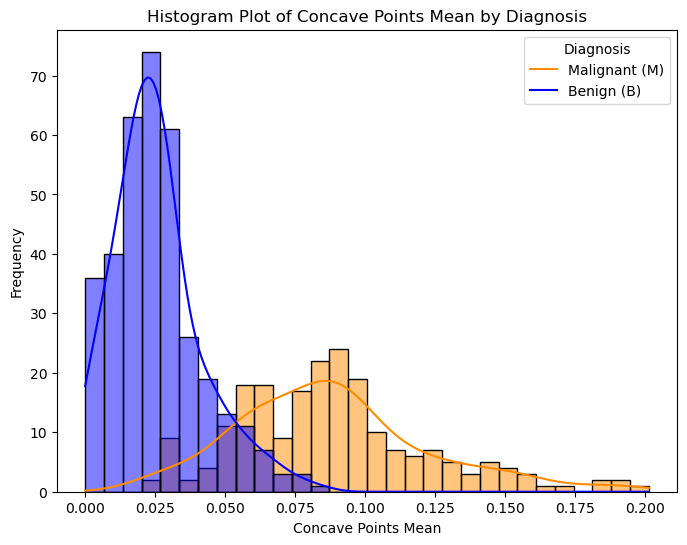

In [23]:

# Define custom colors for 'Malignant' and 'Benign'
custom_palette = {1: 'darkorange', 0: 'blue'}

# Create a histogram plot
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='concave points_mean', hue='diagnosis', bins=30, kde=True, palette=custom_palette)

# Set plot labels and title
plt.xlabel('Concave Points Mean')
plt.ylabel('Frequency')
plt.title('Histogram Plot of Concave Points Mean by Diagnosis')

# Add a legend
plt.legend(title='Diagnosis', labels=['Malignant (M)', 'Benign (B)'])

# Show the plot
plt.show()


In [ ]:
calculate_t_test(df, ['concave points_mean'], target_variable)


Hypothesis 1: radius_worst have a positive relationship with diagnosis
* Null: radius_worst does not have a relationship with diagnosis
* Alternative: radius_worst have a negative relationship with diagnosis

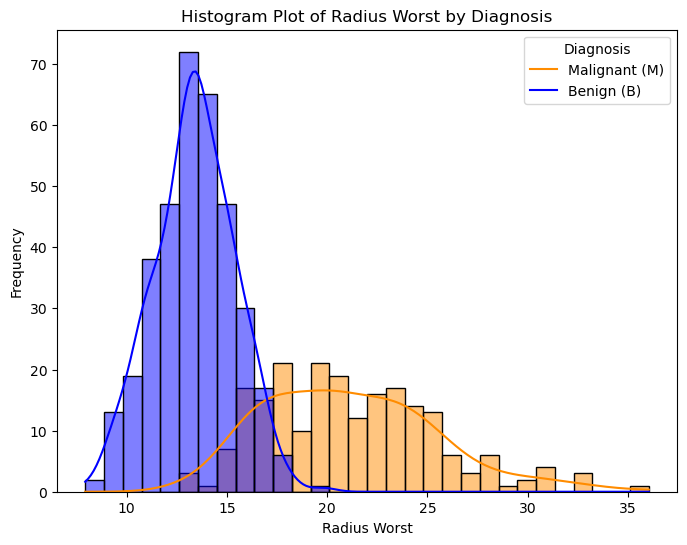

In [24]:

# Define custom colors for 'Malignant' and 'Benign'
custom_palette = {1: 'darkorange', 0: 'blue'}

# Create a histogram plot
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='radius_worst', hue='diagnosis', bins=30, kde=True, palette=custom_palette)

# Set plot labels and title
plt.xlabel('Radius Worst')
plt.ylabel('Frequency')
plt.title('Histogram Plot of Radius Worst by Diagnosis')

# Add a legend
plt.legend(title='Diagnosis', labels=['Malignant (M)', 'Benign (B)'])

# Show the plot
plt.show()



In [ ]:
calculate_t_test(df, ['radius_worst'], target_variable)


Hypothesis 1: perimeter_worst have a positive relationship with diagnosis
* Null: perimeter_worst does not have a relationship with diagnosis
* Alternative: perimeter_worst have a negative relationship with diagnosis

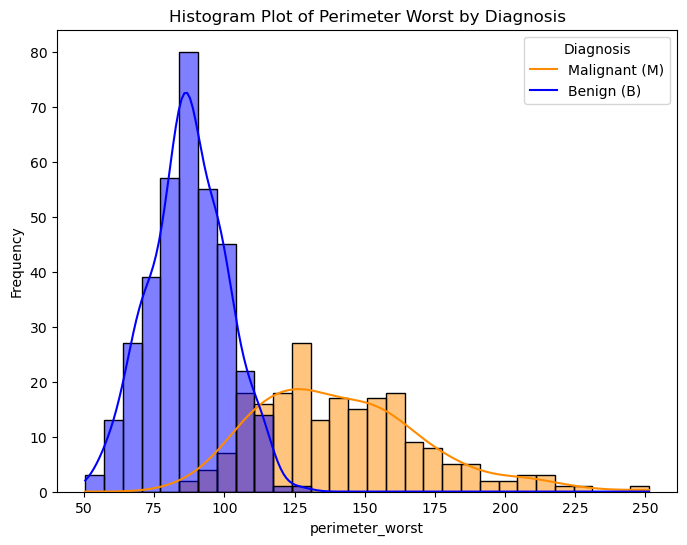

In [25]:

# Define custom colors for 'Malignant' and 'Benign'
custom_palette = {1: 'darkorange', 0: 'blue'}

# Create a histogram plot
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='perimeter_worst', hue='diagnosis', bins=30, kde=True, palette=custom_palette)

# Set plot labels and title
plt.xlabel('perimeter_worst')
plt.ylabel('Frequency')
plt.title('Histogram Plot of Perimeter Worst by Diagnosis')

# Add a legend
plt.legend(title='Diagnosis', labels=['Malignant (M)', 'Benign (B)'])

# Show the plot
plt.show()


In [ ]:
calculate_t_test(df, ['perimeter_worst'], target_variable)


Hypothesis 1: Concave points_worst have a positive relationship with diagnosis
* Null: concave points_worst does not have a relationship with diagnosis
* Alternative: concave points_worst have a negative relationship with diagnosis

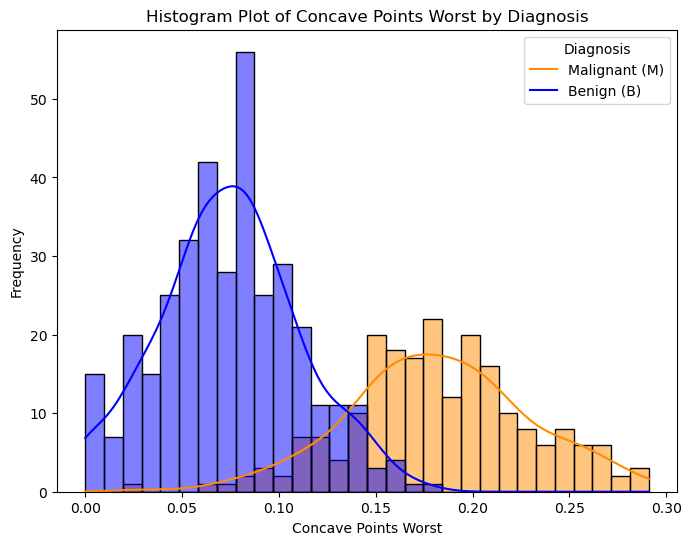

In [26]:


# Define custom colors for 'Malignant' and 'Benign'
custom_palette = {1: 'darkorange', 0: 'blue'}

# Create a histogram plot
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='concave points_worst', hue='diagnosis', bins=30, kde=True, palette=custom_palette)

# Set plot labels and title
plt.xlabel('Concave Points Worst')
plt.ylabel('Frequency')
plt.title('Histogram Plot of Concave Points Worst by Diagnosis')

# Add a legend
plt.legend(title='Diagnosis', labels=['Malignant (M)', 'Benign (B)'])

# Show the plot
plt.show()



In [27]:
calculate_t_test(df, ['concave points_worst'], target_variable)


T-Test Results:
T-Test between concave points_worst and diagnosis:
T-Statistic: -31.0546
P-value: 0.0000

T-Test between concave points_worst and diagnosis is statistically significant.


### EDA Takeaways:

* concave points_mean have a significant correlation with diagnosis
* radius_worst have a significant correlation with diagnosis
* perimeter_worst have a significant correlation with diagnosis
* concave points_worst have a significant correlation with diagnosis

# Model

In [28]:
# Train and evaluate models on the validation set using five different ML algorithms; 
trained_models = train_and_evaluate_models(X_train, Y_train, X_validation, Y_validation)


Model [0] Train Accuracy: 0.94
Model [1] Train Accuracy: 1.00
Model [2] Train Accuracy: 0.99
Model [3] Train Accuracy: 0.94
Model [4] Train Accuracy: 0.98
Model [0] Validation Accuracy: 0.98
Model [1] Validation Accuracy: 0.95
Model [2] Validation Accuracy: 0.93
Model [3] Validation Accuracy: 0.94
Model [4] Validation Accuracy: 0.94


In [29]:
#The best came out to be logistic regression, so we use that model for the unseen data
evaluate_best_model(trained_models, X_test, Y_test)


Test Accuracy: 0.95
Predictions saved to predictions.csv


### Conclusions:

* concave points_mean is a key driver of diagnosis
* radius_worst is a key driver of diagnosis
* perimeter_worst is a key driver of diagnosis
* concave points_worst is a key driver of diagnosis